In [25]:
import pandas as pd
import math
import yfinance as yf
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [26]:
stock_symbols = ['AMZN','MSFT','AAPL']

# Incorrect predictions

In [27]:
def model_func(stock_symbol):
    stock_data = yf.download(stock_symbol, start="2010-01-01", end=pd.Timestamp.now())
    stock_data['Date'] = stock_data.index
    stock_data.reset_index(drop=True, inplace=True)

    train_size = int(0.8 * len(stock_data))
    train_data = stock_data.iloc[:train_size]
    test_data = stock_data.iloc[train_size:]

    xtrain = train_data[['Open','High','Low','Volume']]
    ytrain = train_data['Close']
    xtest = test_data[['Open','High','Low','Volume']]
    ytest = test_data['Close']

    model = OLS(ytrain, xtrain).fit()
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)

    train_mse = mean_squared_error(ytrain,train_pred)
    test_mse = mean_squared_error(ytest,test_pred)

    train_mae = mean_absolute_error(ytrain,train_pred)
    test_mae = mean_absolute_error(ytest,test_pred)

    train_r2 = r2_score(ytrain,train_pred)
    test_r2 = r2_score(ytest,test_pred)

    print(f"Summary for {stock_symbol}: ")
    display(model.summary())

    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(stock_data['Date'], stock_data['Close'], label='Actuals', color='red')
    plt.plot(train_data['Date'], train_pred, label='Train predictions', color='blue')
    plt.plot(test_data['Date'], test_pred,label='Test predictions', color='green')
    plt.title(f"{stock_symbol} Actual vs Predictions")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(train_data['Date'], ytrain - train_pred, label='Train residuals', alpha=0.5)
    plt.scatter(test_data['Date'], ytest - test_pred,label='Test residuals', alpha=0.5)
    plt.title(f"{stock_symbol} Residuals")
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.legend()

    plt.show()

    return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2


[*********************100%%**********************]  1 of 1 completed

Summary for AMZN: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.511e+07
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:55:06   Log-Likelihood:                         -1806.3
No. Observations:                2874   AIC:                                      3621.
Df Residuals:                    2870   BIC:                                      3644.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6034      0.015    -41.539      0.000      -0.632      -0.575
High           0.8279      0.013     62.136      0.000       0.802       0.854
Low            0.7754      0.012     66.823      0.000       0.753       0.798
Volume      1.119e-10   1.02e-10      1.098      0.272   -8.79e-11    3.12e-10
==============================================================================
Omnibus:                      696.779   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38608.089
Skew:                           0.167   Prob(JB):                         0.00
Kurtosis:                      20.953   Cond. No.                     2.27e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

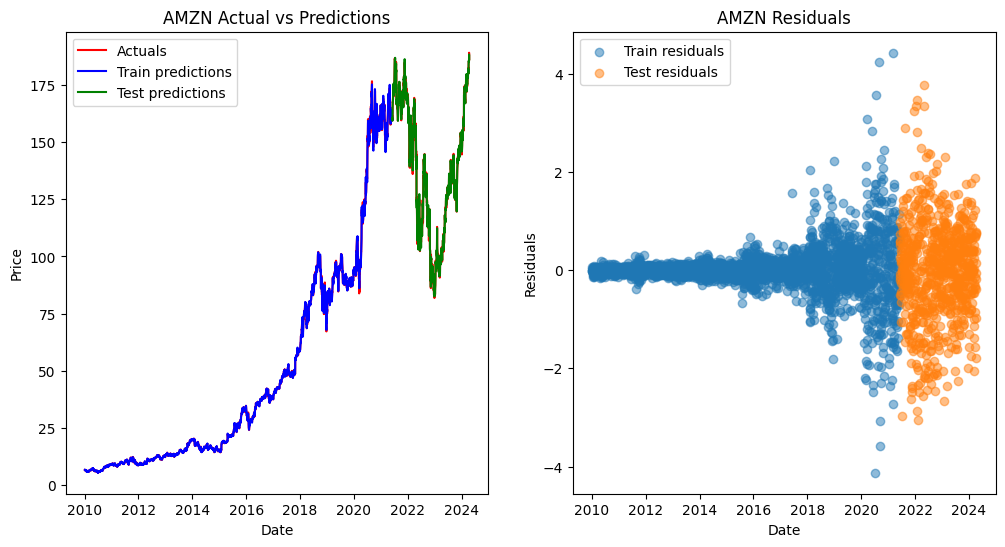

AMZN Train MSE: 0.20579647198164658, Test MSE: 1.0314391238454348
AMZN Train MAE: 0.2326210582801266, Test MAE: 0.7787891126925279
AMZN Train RMSE: 0.45364796040723754, Test RMSE: 1.015597914455044
AMZN Train R^2: 0.9999019341118859, Test R^2 : 0.9987361413606599


[*********************100%%**********************]  1 of 1 completed

Summary for MSFT: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.686e+07
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:55:07   Log-Likelihood:                         -2733.1
No. Observations:                2874   AIC:                                      5474.
Df Residuals:                    2870   BIC:                                      5498.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5821      0.016    -35.858      0.000      -0.614      -0.550
High           0.7546      0.013     58.083      0.000       0.729       0.780
Low            0.8288      0.013     64.914      0.000       0.804       0.854
Volume      -1.04e-10   3.23e-10     -0.322      0.748   -7.37e-10    5.29e-10
==============================================================================
Omnibus:                      971.278   Durbin-Watson:                   2.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94809.928
Skew:                          -0.618   Prob(JB):                         0.00
Kurtosis:                      31.111   Cond. No.                     7.68e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

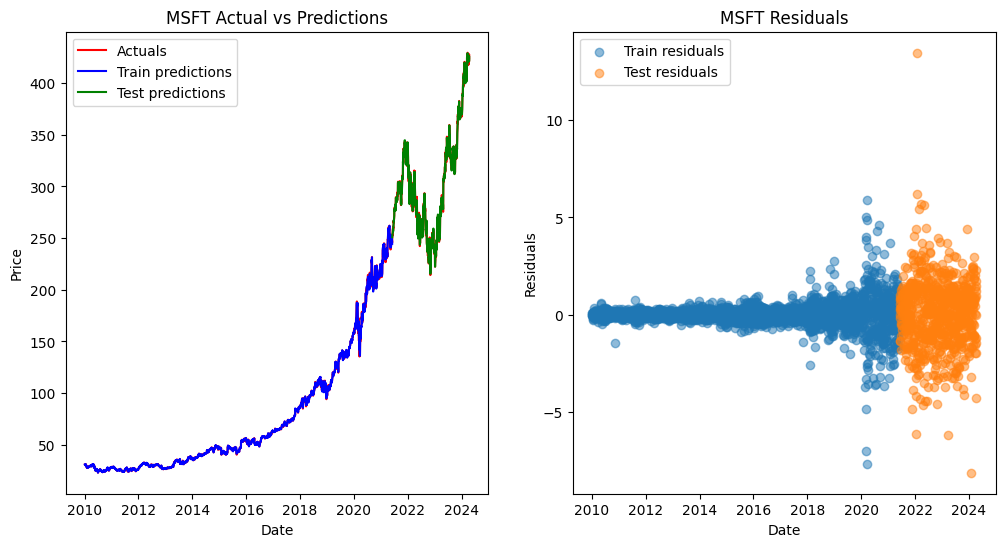

MSFT Train MSE: 0.3922170787007882, Test MSE: 3.1830869457600013
MSFT Train MAE: 0.3233049067190558, Test MAE: 1.3461932686371254
MSFT Train RMSE: 0.6262723678247254, Test RMSE: 1.7841207766740461
MSFT Train R^2: 0.9998905271327836, Test R^2 : 0.9987210013270673


[*********************100%%**********************]  1 of 1 completed

Summary for AAPL: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.228e+07
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:55:09   Log-Likelihood:                         -1185.7
No. Observations:                2874   AIC:                                      2379.
Df Residuals:                    2870   BIC:                                      2403.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5470      0.016    -33.308      0.000      -0.579      -0.515
High           0.8250      0.014     57.007      0.000       0.797       0.853
Low            0.7213      0.012     58.531      0.000       0.697       0.746
Volume     -1.811e-12   2.08e-11     -0.087      0.931   -4.26e-11     3.9e-11
==============================================================================
Omnibus:                      922.790   Durbin-Watson:                   2.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136845.311
Skew:                          -0.350   Prob(JB):                         0.00
Kurtosis:                      36.797   Cond. No.                     1.08e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

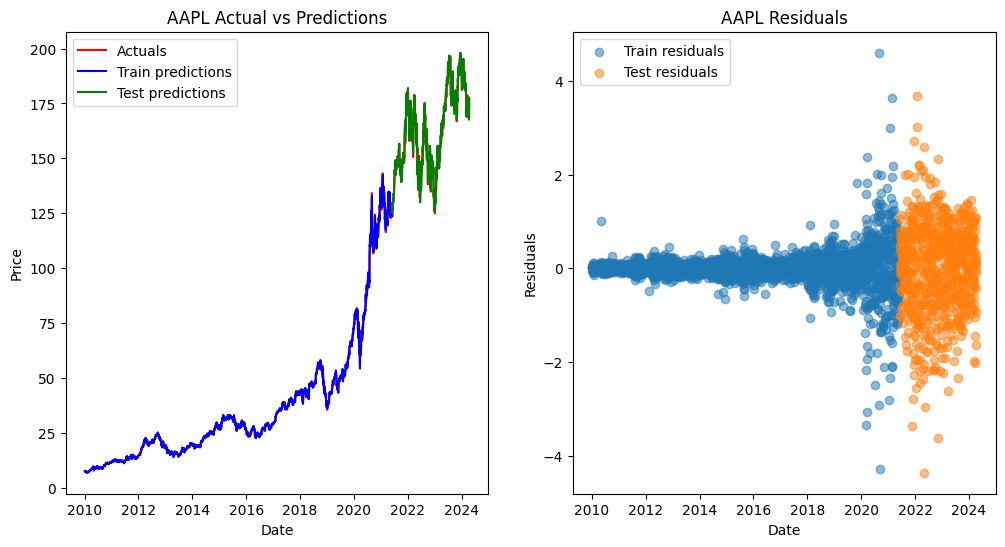

AAPL Train MSE: 0.1336170030851702, Test MSE: 0.9298229746665025
AAPL Train MAE: 0.1811655299154598, Test MAE: 0.7580888059130119
AAPL Train RMSE: 0.36553659609561695, Test RMSE: 0.9642732883713531
AAPL Train R^2: 0.999851445076046, Test R^2 : 0.9971047439608242


In [28]:
for val in stock_symbols:
    train_mse, test_mse, train_mae, test_mae, train_r2, test_r2 = model_func(val)
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    print(f"{val} Train MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"{val} Train MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"{val} Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"{val} Train R^2: {train_r2}, Test R^2 : {test_r2}")